# RandomForestRegressor, GridSearchCV
## Module import

In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt

## GridSearchCV training and testing

In [5]:
# Set the directory containing the CSV files
input_dir = '../../1-preprocessing/data/9-splits/USD'

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [1, 3, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Optimized
param_grid = {
    'n_estimators': [100],
    'max_features': ['log2'],
    'max_depth': [3, 10],
    'min_samples_split': [10, 20],
    'min_samples_leaf': [2]
}

offset = '15'

train_data = pd.read_csv(os.path.join(input_dir, offset, "train_data.csv"))
test_data = pd.read_csv(os.path.join(input_dir, offset, "test_data.csv"))

# Split the data into features and target
X_train = train_data.iloc[:, 1:-1]
y_train = train_data.iloc[:, -1]
X_test = test_data.iloc[:, 1:-1]
y_test = test_data.iloc[:, -1]

# Initialize model
model = RandomForestRegressor(
    # oob_score=True,
    random_state=0
)

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='neg_mean_squared_error',  # evaluation metric
    n_jobs=-1  # use all available CPU cores
)

# Fit the RandomForestRegressor model
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)

# Calculate MAPE
mape = mean_absolute_percentage_error(y_test, y_pred)

# Calculate the Directional Symmetry (hit rate)
hit_rate = (np.sign(y_pred) == np.sign(y_test)).mean()

# Print the results
print(f"Best parameters: {grid_search.best_params_}")
print("---")
print(f"Best  NMSE: {grid_search.best_score_:.3f}")
# oob_error = 1 - grid_search.best_estimator_.oob_score_
# print(f"Best  OOB Error: {oob_error}")
print("---")
print("Test set evaluation:")
print(f"MSE: {mse:.3f}")
print(f"MAE: {mae:.3f}")
print(f"MAPE: {mape:.3f}")
print(f"Directional Symmetry (hit rate): {hit_rate:.2f}")

Best parameters: {'max_depth': 3, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
---
Best  NMSE: -0.013
---
Test set evaluation:
MSE: 0.009
MAE: 0.057
MAPE: 1.710
Directional Symmetry (hit rate): 0.85


## Plot test set and prediction set

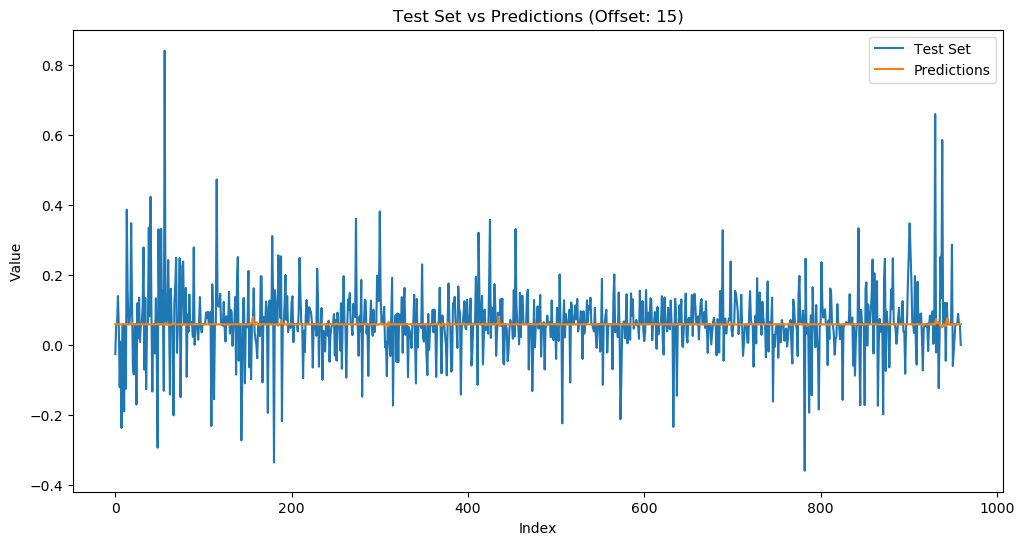

In [7]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Test Set')
plt.plot(y_pred, label='Predictions')
plt.title(f'Test Set vs Predictions (Offset: {offset})')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()